### This script performs a varimax-rotated PCA (R-verified)

##### By: Kwesi A. Quagraine (2019)

In [1]:
%load_ext rpy2.ipython
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid', {'axes.grid' : False})
%matplotlib inline

#### set directory and import dataset

In [2]:
datadir = '/home/kwesi/terra/research/CMIP5_models/cmip5_smhi/cmip_trbi/roll_freq_matrix/'
#outdir = '/Volumes/Maxtor/CMIP5_models/cmip5_smhi/cmip_trbi/roll_freq_matrix'§

In [3]:
import os
a = os.chdir('/home/kwesi/terra/research/CMIP5_models/cmip5_smhi/cmip_trbi/roll_freq_matrix/')

In [4]:
os.listdir(a);

In [5]:
data = pd.read_csv(datadir + 'zg700_ECMWF-ERAINT_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

#### select specific columns in dataset

In [6]:
df = data.iloc[:,0:15]

In [7]:
type(df); df.head()

,"0,0","0,1","0,2","1,0","1,1","1,2","2,0","2,1","2,2","3,0","3,1","3,2",ITCZInt,NINO34,AAO
1980 Jan-1980 Mar,0,0,6,0,5,9,8,5,13,12,20,13,6.093,0.243,0.754
1980 Feb-1980 Apr,0,2,6,4,6,13,7,5,9,11,16,11,6.427,0.178,1.195
1980 Mar-1980 May,8,9,10,7,3,12,6,6,8,8,8,7,6.113,0.079,0.991
1980 Apr-1980 Jun,15,15,9,9,6,13,6,6,5,6,0,1,5.903,0.173,0.386
1980 May-1980 Jul,15,15,20,6,7,16,3,5,5,0,0,0,6.273,0.078,0.403


#### extract values at each node of the SOM frequency dataset

In [8]:
nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
x = df.loc[:, nodes].values

# Standardizing the nodes
x = StandardScaler().fit_transform(x)

#type (x); x.shape; x ;     #x type is a numpy array

#### perform factor analysis with varimax rotation

In [9]:
n_comps = 3

In [10]:
fan = FactorAnalysis(n_components=n_comps, rotation='varimax').fit(x)
#fan.get_covariance().shape

fan.components_.T;

#get scores of pca
fan_scores = fan.transform(x)

fan_scores;

In [11]:
fan.components_.T

array([[-0.81466441, -0.05114792,  0.02298098],
       [-0.83238119,  0.09386634,  0.19716895],
       [-0.6949817 ,  0.34330258,  0.30488805],
       [-0.67932832,  0.02956423, -0.3017795 ],
       [-0.31552456,  0.45061526, -0.28737788],
       [-0.02346046,  0.71895328,  0.0395794 ],
       [-0.111581  , -0.08632457, -0.68990068],
       [ 0.45528382,  0.12106721, -0.41562568],
       [ 0.65591984,  0.28876107,  0.1991105 ],
       [ 0.56138878, -0.54268256, -0.10603226],
       [ 0.74224166, -0.46621385,  0.19748974],
       [ 0.74751498, -0.24561032,  0.29153992],
       [ 0.10927621, -0.16999334, -0.08048668],
       [-0.18153236,  0.58719669,  0.06848855],
       [ 0.00918826,  0.03879935, -0.25848108]])

In [ ]:
m = fa.components_
n = fa.noise_variance_

In [12]:
df_scores = pd.DataFrame(fan_scores,columns = ['RC1', 'RC2','RC3'])
df_scores;
#df_scores.to_csv('ERAINT_pca_scores.csv')

#### create a dataframe from rotated principal compnents

In [13]:
principalDf = pd.DataFrame(data = fan.components_.T, columns = ['RC1', 'RC2','RC3'])

In [14]:
principalDf.rename(index={0:'0,0',1:'0,1',2:'0,2',3:'1,0',4:'1,1',5:'1,2',
                         6:'2,0',7:'2,1',8:'2,2',9:'3,0',10:'3,1',11:'3,2',
                         12:'ITCZInt',13:'NINO34',14:'AAO'}, inplace=True)


In [15]:
principalDf;

#### fitting observational data to CMIP5 models for scores

In [16]:
CanESM = pd.read_csv(datadir + 'zg700_CanESM2_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

CanESM_df = CanESM.iloc[:,0:15]
CanESM_df.head();


#### extract values at each node of the SOM frequency dataset
CanESM_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
CanESM_x = CanESM_df.loc[:, CanESM_nodes].values

# Standardizing the nodes
CanESM_x = StandardScaler().fit_transform(CanESM_x)
CanESM_x;

#use era interim pca to predict model pca
CanESM_scores_x = fan.transform(CanESM_x)

CanESM_scores_x;

CanESM_scores = pd.DataFrame(CanESM_scores_x,columns = ['RC1', 'RC2','RC3'])
CanESM_scores;
#CanESM_scores.to_csv('CanESM_pca_scores.csv')


In [20]:
CNRM = pd.read_csv(datadir + 'zg700_CNRM-CM5_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

CNRM_df = CNRM.iloc[:,0:15]
CNRM_df.head();


#### extract values at each node of the SOM frequency dataset
CNRM_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
CNRM_x = CNRM_df.loc[:, CNRM_nodes].values

# Standardizing the nodes
CNRM_x = StandardScaler().fit_transform(CNRM_x)
CNRM_x;

#use era interim pca to predict model pca
CNRM_scores_x = fan.transform(CNRM_x)

CNRM_scores_x;

CNRM_scores = pd.DataFrame(CNRM_scores_x,columns = ['RC1', 'RC2','RC3'])
CNRM_scores;
#CNRM_scores.to_csv('CNRM_pca_scores.csv')


In [21]:
GFDL = pd.read_csv(datadir + 'zg700_GFDL-ESM2M_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

GFDL_df = GFDL.iloc[:,0:15]
GFDL_df.head();


#### extract values at each node of the SOM frequency dataset
GFDL_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
GFDL_x = GFDL_df.loc[:, GFDL_nodes].values

# Standardizing the nodes
GFDL_x = StandardScaler().fit_transform(GFDL_x)
GFDL_x;

#use era interim pca to predict model pca
GFDL_scores_x = fan.transform(GFDL_x)

GFDL_scores_x;

GFDL_scores = pd.DataFrame(GFDL_scores_x,columns = ['RC1', 'RC2','RC3'])
GFDL_scores;
#GFDL_scores.to_csv('GFDL_pca_scores.csv')


In [22]:
HadGEM = pd.read_csv(datadir + 'zg700_HadGEM2-ES_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

HadGEM_df = HadGEM.iloc[:,0:15]
HadGEM_df.head();


#### extract values at each node of the SOM frequency dataset
HadGEM_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
HadGEM_x = HadGEM_df.loc[:, HadGEM_nodes].values

# Standardizing the nodes
HadGEM_x = StandardScaler().fit_transform(HadGEM_x)
HadGEM_x;

#use era interim pca to predict model pca
HadGEM_scores_x = fan.transform(HadGEM_x)

HadGEM_scores_x;

HadGEM_scores = pd.DataFrame(HadGEM_scores_x,columns = ['RC1', 'RC2','RC3'])
HadGEM_scores;
#HadGEM_scores.to_csv('HadGEM_pca_scores.csv')


In [23]:
IPSL = pd.read_csv(datadir + 'zg700_IPSL-CM5A-LR_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

IPSL_df = IPSL.iloc[:,0:15]
IPSL_df.head();


#### extract values at each node of the SOM frequency dataset
IPSL_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
IPSL_x = IPSL_df.loc[:, IPSL_nodes].values

# Standardizing the nodes
IPSL_x = StandardScaler().fit_transform(IPSL_x)
IPSL_x;

#use era interim pca to predict model pca
IPSL_scores_x = fan.transform(IPSL_x)

IPSL_scores_x;

IPSL_scores = pd.DataFrame(IPSL_scores_x,columns = ['RC1', 'RC2','RC3'])
IPSL_scores;
#IPSL_scores.to_csv('IPSL_pca_scores.csv')


In [24]:
MIROC = pd.read_csv(datadir + 'zg700_MIROC-ESM_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

MIROC_df = MIROC.iloc[:,0:15]
MIROC_df.head();


#### extract values at each node of the SOM frequency dataset
MIROC_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
MIROC_x = MIROC_df.loc[:, MIROC_nodes].values

# Standardizing the nodes
MIROC_x = StandardScaler().fit_transform(MIROC_x)
MIROC_x;

#use era interim pca to predict model pca
MIROC_scores_x = fan.transform(MIROC_x)

MIROC_scores_x;

MIROC_scores = pd.DataFrame(MIROC_scores_x,columns = ['RC1', 'RC2','RC3'])
MIROC_scores;
#MIROC_scores.to_csv('MIROC_pca_scores.csv')


In [25]:
MPI = pd.read_csv(datadir + 'zg700_MPI-ESM-LR_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

MPI_df = MPI.iloc[:,0:15]
MPI_df.head();


#### extract values at each node of the SOM frequency dataset
MPI_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
MPI_x = MPI_df.loc[:, MPI_nodes].values

# Standardizing the nodes
MPI_x = StandardScaler().fit_transform(MPI_x)
MPI_x;

#use era interim pca to predict model pca
MPI_scores_x = fan.transform(MPI_x)

MPI_scores_x;

MPI_scores = pd.DataFrame(MPI_scores_x,columns = ['RC1', 'RC2','RC3'])
MPI_scores;
#MPI_scores.to_csv('MPI_pca_scores.csv')


In [26]:
MRI = pd.read_csv(datadir + 'zg700_MRI-CGCM3_rcp85_r1i1p1_19800101-20131231_matrix.csv',names = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO'], header =0)

MRI_df = MRI.iloc[:,0:15]
MRI_df.head();


#### extract values at each node of the SOM frequency dataset
MRI_nodes = ['0,0','0,1','0,2','1,0','1,1','1,2','2,0','2,1','2,2','3,0','3,1'
         ,'3,2','ITCZInt','NINO34','AAO']

## Separating out the nodes
MRI_x = MRI_df.loc[:, MRI_nodes].values

# Standardizing the nodes
MRI_x = StandardScaler().fit_transform(MRI_x)
MRI_x;

#use era interim pca to predict model pca
MRI_scores_x = fan.transform(MRI_x)

MRI_scores_x;

MRI_scores = pd.DataFrame(MRI_scores_x,columns = ['RC1', 'RC2','RC3'])
MRI_scores;
#MRI_scores.to_csv('MRI_pca_scores.csv')


#### Distribution, kendalltau correlation and pvalue

In [74]:
#create a custom colormap
tableau_20 =[(31,119,180),(174,199,232),(255,127,14),(255,187,120),
            (44,160,44),(152,223,138),(214,39,40),(255,152,150),
            (148,103,189),(197,176,213),(140,86,75),(196,156,148),
            (227,119,194),(247,182,210),(127,127,127),(199,199,199),
            (188,189,34),(219,219,141),(23,190,207),(158,218,229)]

#           [steelblue,lightsteelblue,darkorange,peach(sandybrown),
#           green,lightgreen,crimsonred,lightcoral,
#           mediumpurple,palepurple,brown,darksalmon,
#           violet,pink,dimgrey,darkgrey,
#           olive,palegoldenrod,lightseagreen,powderblue]

#scaling above RBG values to [0,1] range, which is Matplotlib acceptable format:
for i in range(len(tableau_20)):
    r, g, b = tableau_20[i]
    tableau_20[i] = (r/255., g/255., b/255.)
    #plt.plot(tableau_20[i])
    #plt.pcolor(tableau_20)

In [75]:
#create dataframe using column names; for index location use; pk = pd.DataFrame({'ERA': df_scores.iloc[:,0], 'CanESM': CanESM_scores.iloc[:,0]})
can = pd.DataFrame({'ERA': df_scores['RC2'], 'CanESM': CanESM_scores['RC2']})
cnr = pd.DataFrame({'ERA': df_scores['RC2'], 'CNRM': CNRM_scores['RC2']})
gfd = pd.DataFrame({'ERA': df_scores['RC2'], 'GFDL': GFDL_scores['RC2']})
had = pd.DataFrame({'ERA': df_scores['RC2'], 'HadGEM': HadGEM_scores['RC2']})
ips = pd.DataFrame({'ERA': df_scores['RC2'], 'IPSL': IPSL_scores['RC2']})
mir = pd.DataFrame({'ERA': df_scores['RC2'], 'MIROC': MIROC_scores['RC2']})
mpi = pd.DataFrame({'ERA': df_scores['RC2'], 'MPI': MPI_scores['RC2']})
mri = pd.DataFrame({'ERA': df_scores['RC2'], 'MRI': MRI_scores['RC2']})


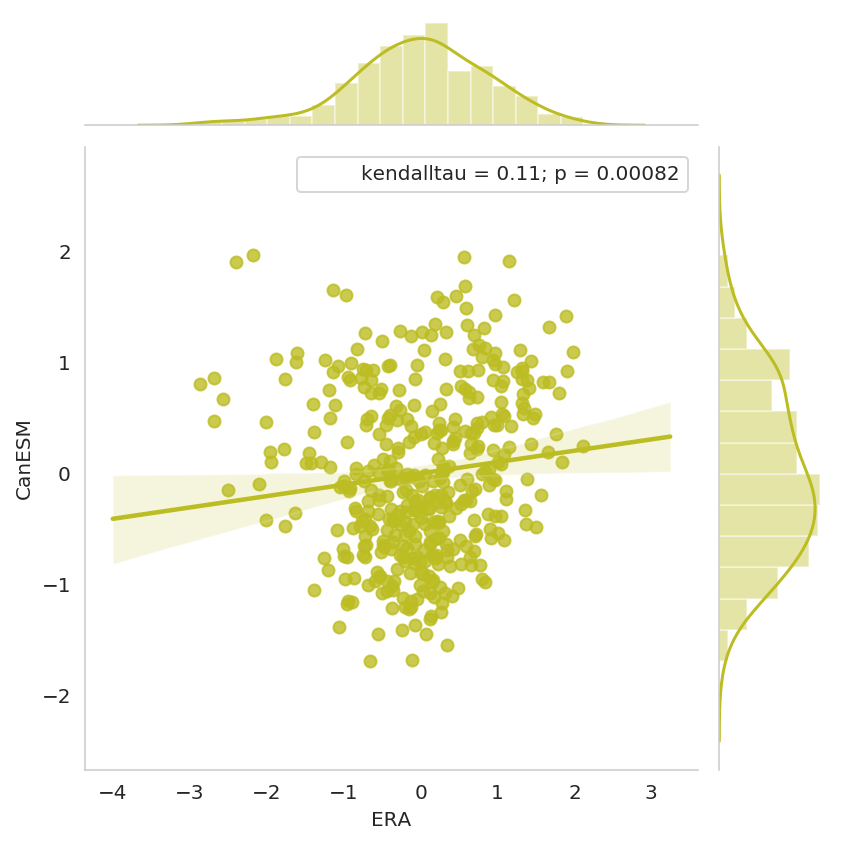

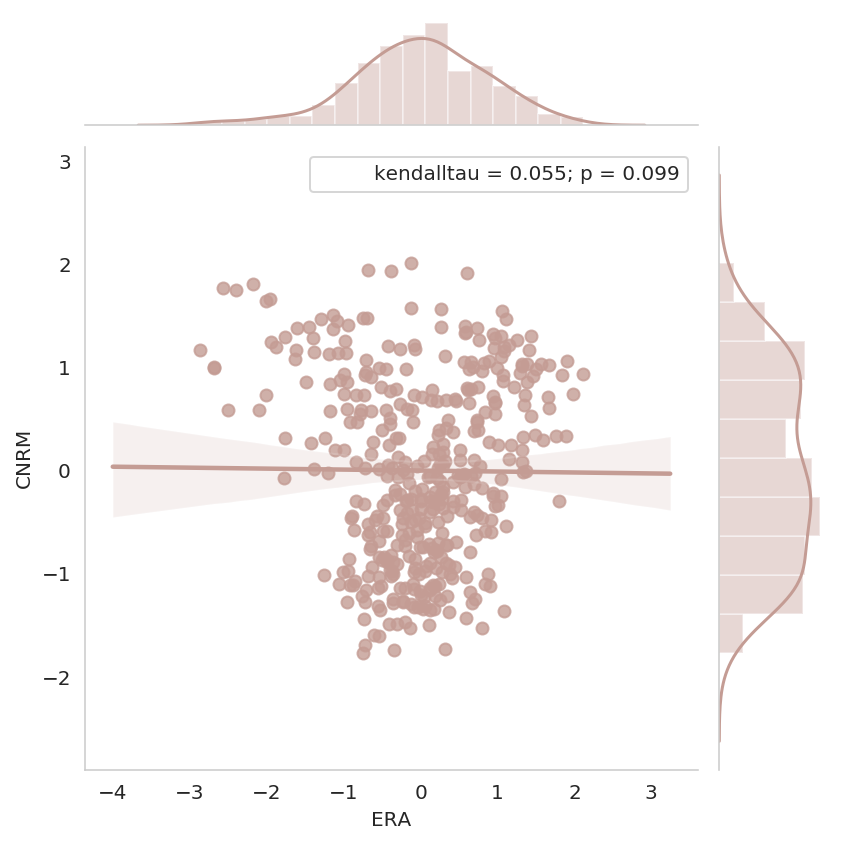

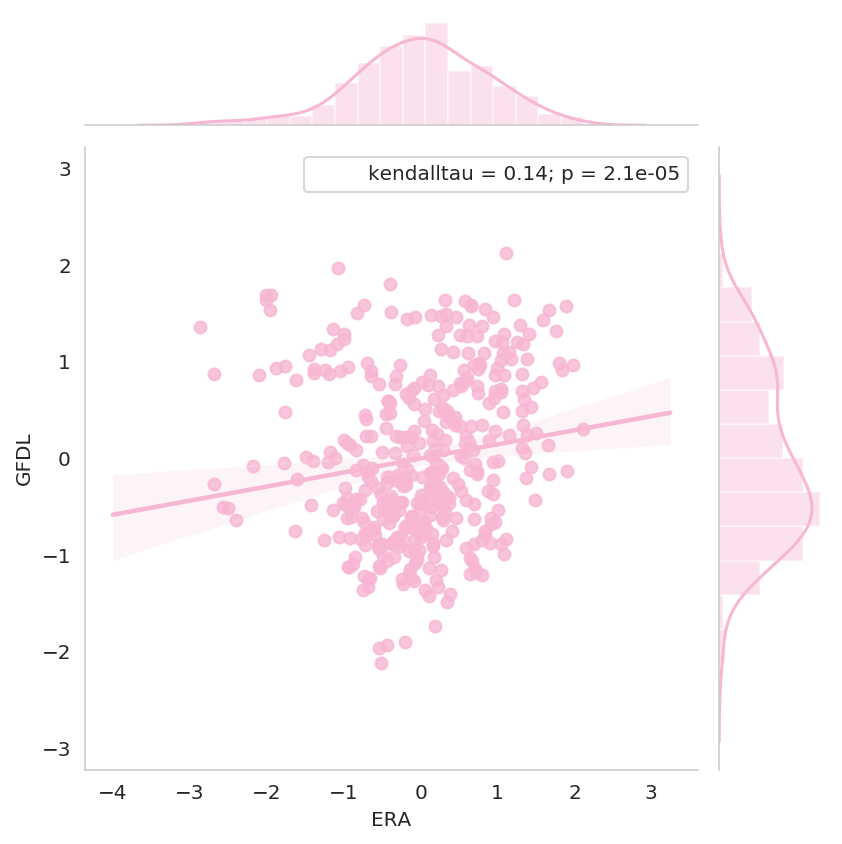

In [76]:
#make joint plot
a = sns.jointplot('ERA','CanESM', data=can,kind='reg',color=tableau_20[16])
a.annotate(stats.kendalltau)

b = sns.jointplot('ERA','CNRM', data=cnr,kind='reg',color=tableau_20[11])
b.annotate(stats.kendalltau)

c = sns.jointplot('ERA','GFDL', data=gfd,kind='reg',color=tableau_20[13])
c.annotate(stats.kendalltau)



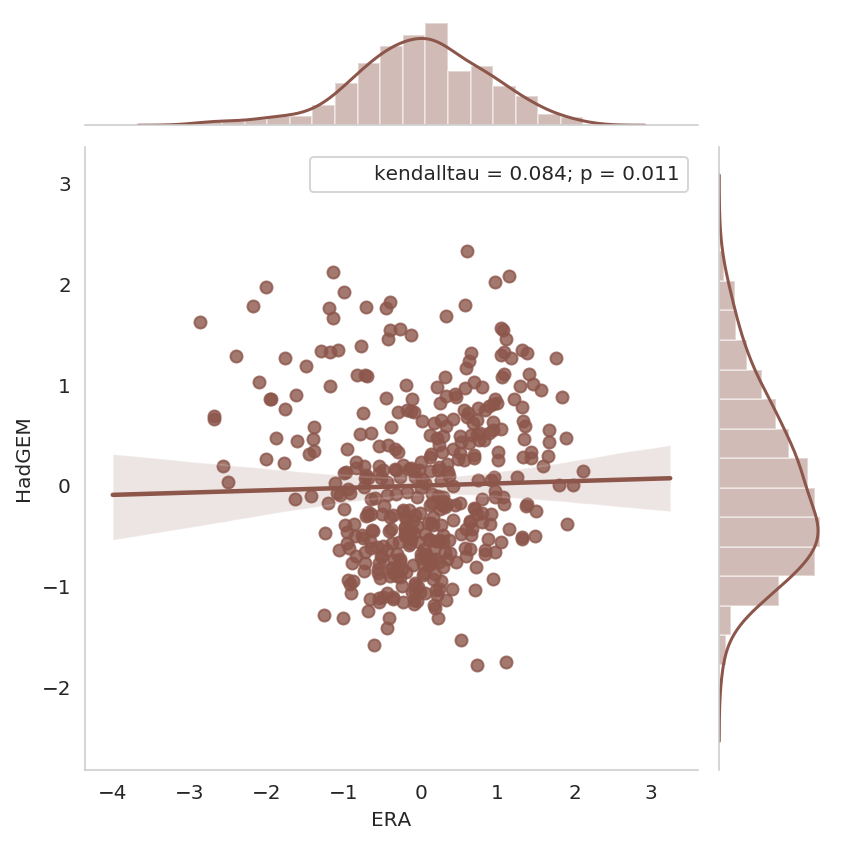

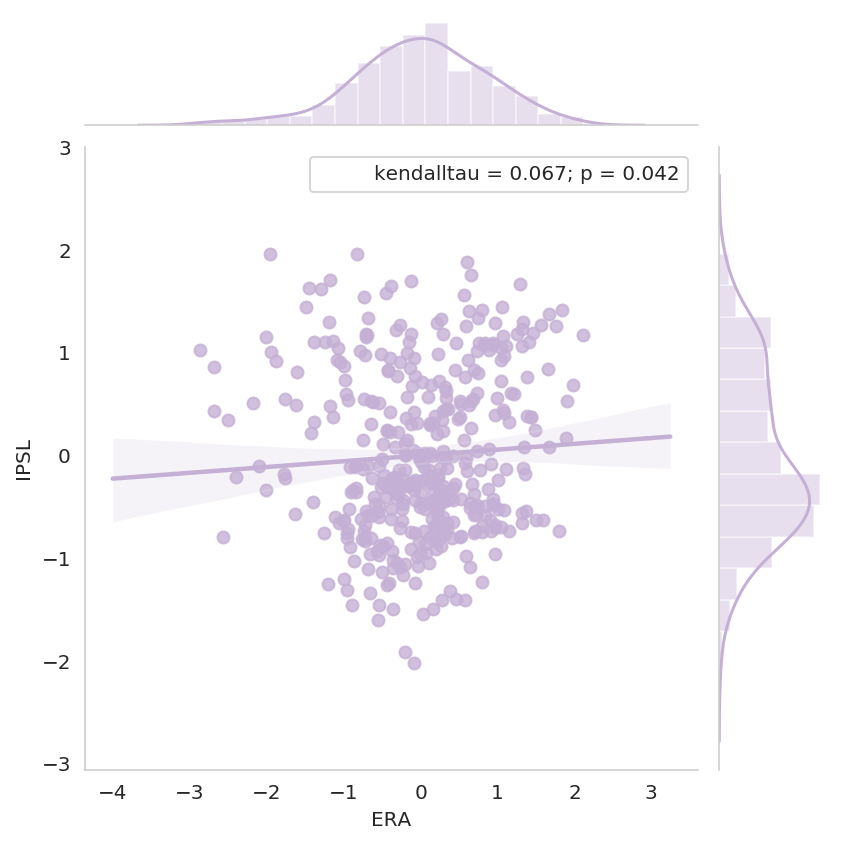

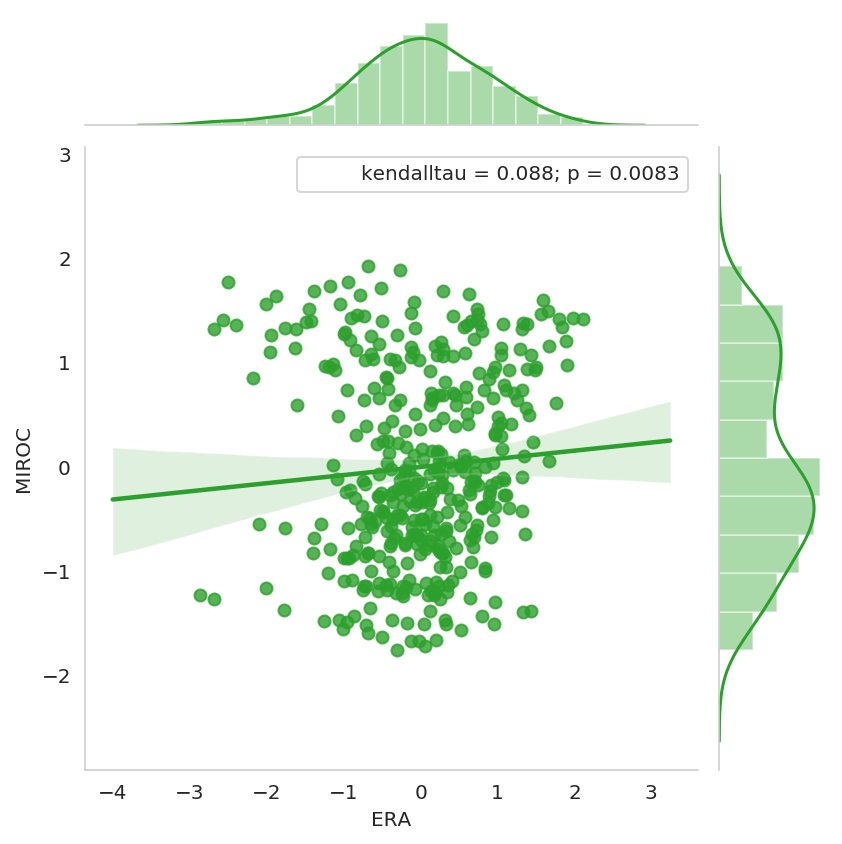

In [77]:
d = sns.jointplot('ERA','HadGEM', data=had,kind='reg',color=tableau_20[10])
d.annotate(stats.kendalltau)

e = sns.jointplot('ERA','IPSL', data=ips,kind='reg',color=tableau_20[9])
e.annotate(stats.kendalltau)

f = sns.jointplot('ERA','MIROC', data=mir,kind='reg',color=tableau_20[4])
f.annotate(stats.kendalltau)



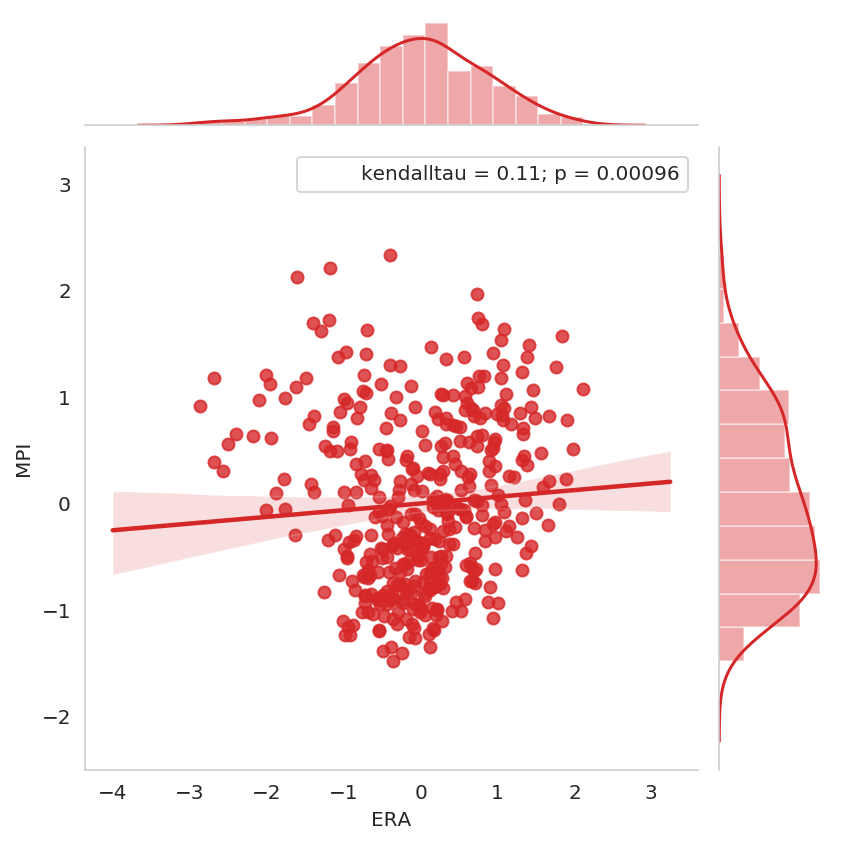

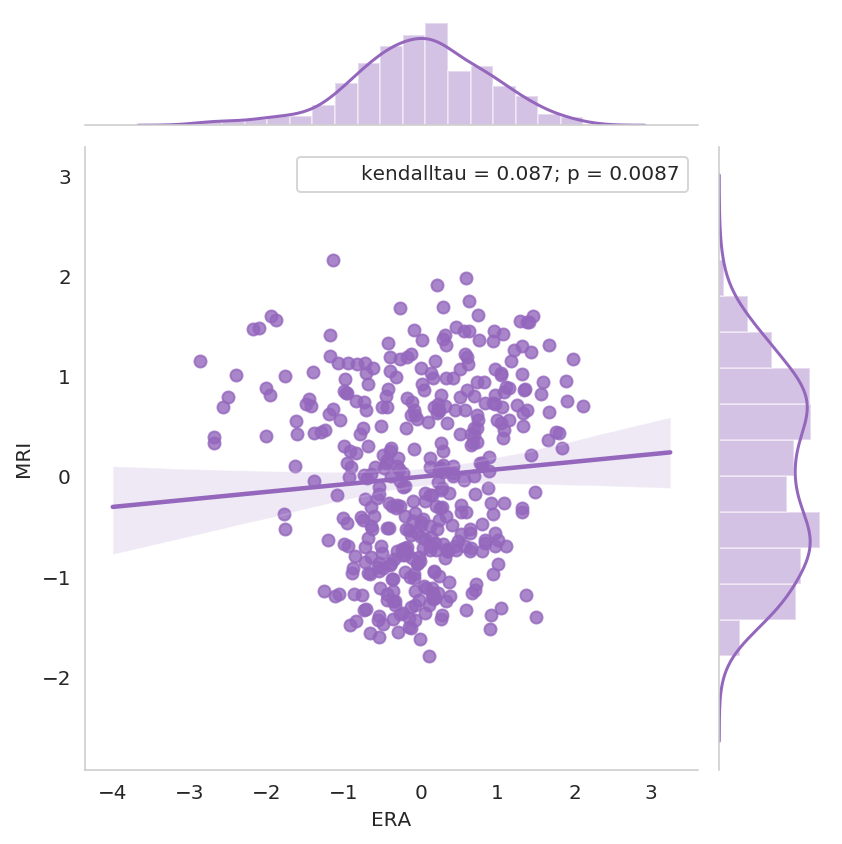

In [78]:
g = sns.jointplot('ERA','MPI', data=mpi,kind='reg',color=tableau_20[6])
g.annotate(stats.kendalltau)

h = sns.jointplot('ERA','MRI', data=mri,kind='reg',color=tableau_20[8])
h.annotate(stats.kendalltau)